In [ ]:
Student name:Alisher Babdjanov
Student ID: 230271
Date: 2026-02-12

In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.

In [13]:
pip install numpy==1.26.4


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)

OpenCV: 4.13.0


Image shape: (225, 225, 3)


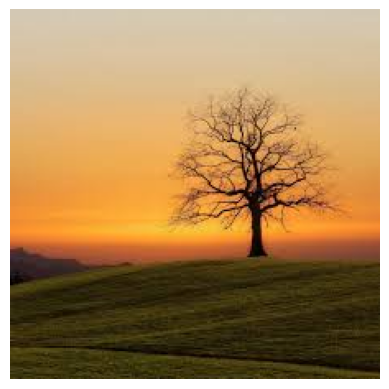

In [4]:
import cv2
import matplotlib.pyplot as plt

IMAGE_PATH = "/Users/230271/Desktop/qwer.jpg"

bgr = cv2.imread(IMAGE_PATH)

if bgr is None:
    print("Image not found. Check the path.")
else:
    img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

    print("Image shape:", img.shape)

    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [5]:
h, w = img.shape[:2]

print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])


Top-left pixel: [211 200 180]
Center pixel: [192 128  93]


In [ ]:
Task 2.1 (Answer)
The three values represent the Red, Green, and Blue (RGB) intensities of the pixel.
Each value ranges from 0 to 255.

Reloaded shape: (225, 225, 3) | dtype: uint8


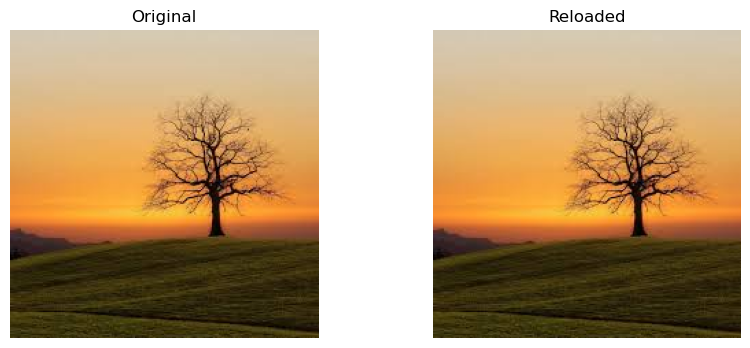

In [7]:
import matplotlib.pyplot as plt
import cv2

out_path = "output_saved.png"

# Convert RGB to BGR before saving
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

# Reload image
reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)

# Display manually
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reloaded_rgb)
plt.title("Reloaded")
plt.axis("off")

plt.show()


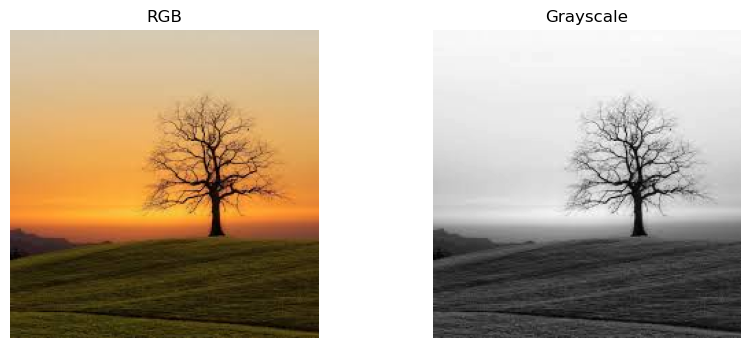

Gray shape: (225, 225) | dtype: uint8


In [9]:
import matplotlib.pyplot as plt
import cv2

# Convert RGB image to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display side by side manually
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.show()

# Print info
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)


In [11]:
import os

IMAGE_PATH = "/Users/230271/Desktop/qwer.jpg"

# Check if file exists
if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(f"Image not found at {IMAGE_PATH}")


Original image shape: (225, 225, 3)


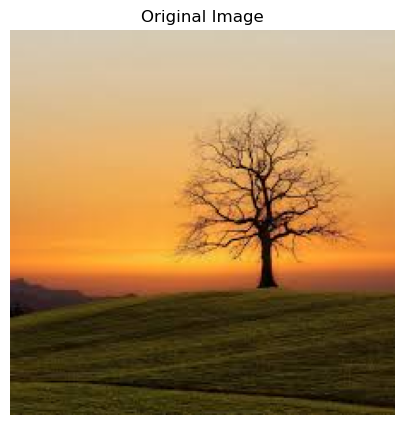

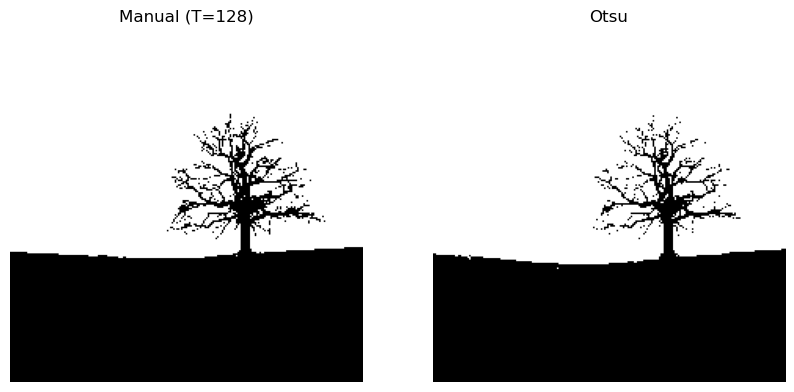

Otsu threshold chosen by OpenCV: 115.0


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# -----------------------------
# Helper functions
# -----------------------------
def show_side_by_side(img1, img2, title1="Img1", title2="Img2", cmap1=None, cmap2=None):
    """Display two images side by side."""
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap=cmap1)
    plt.title(title1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap=cmap2)
    plt.title(title2)
    plt.axis("off")
    plt.show()

def clip_uint8(arr):
    """Clip a float array to 0-255 and convert to uint8."""
    return np.clip(arr, 0, 255).astype(np.uint8)

# -----------------------------
# Load image
# -----------------------------
IMAGE_PATH = "/Users/230271/Desktop/qwer.jpg"
if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(f"Image not found: {IMAGE_PATH}")

img_bgr = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]
print("Original image shape:", img.shape)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# -----------------------------
# Task 3.2 — Threshold to binary
# -----------------------------
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)
_, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", _)

# Task 3.2 Answer:
# Manual thresholding uses a fixed value; Otsu automatically finds an optimal threshold based on histogram.



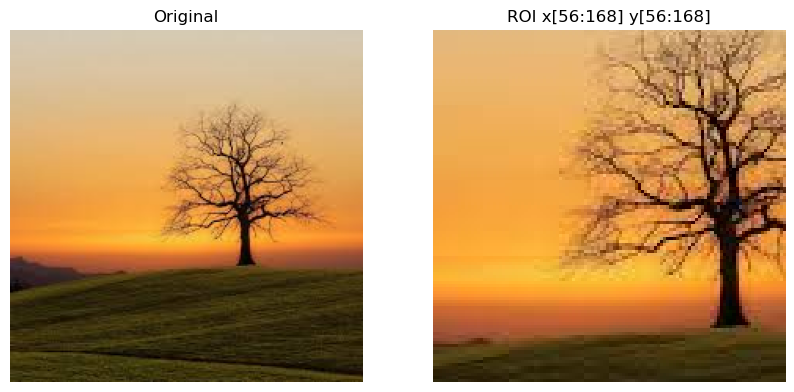

ROI shape: (112, 112, 3)


In [14]:
# -----------------------------
# Task 4.1 — Crop ROI
# -----------------------------
x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)
roi = img[y1:y2, x1:x2].copy()

show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)



In [ ]:
# Task 4.2 Answer:
# Slicing is img[y, x] because NumPy arrays are row-major (first index = row = y, second = column = x).



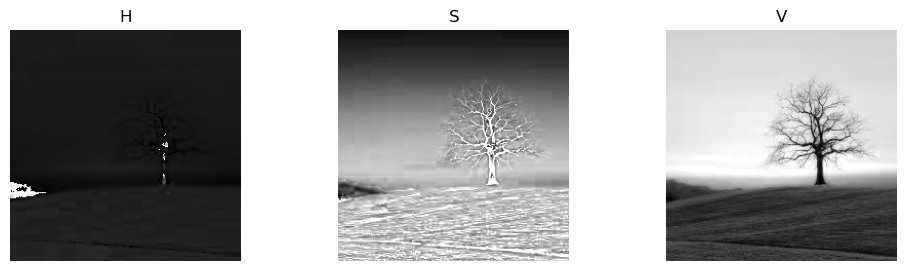

In [15]:
# -----------------------------
# Task 5.1 — Convert RGB to HSV and visualize channels
# -----------------------------
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i)
    plt.imshow(ch, cmap="gray")
    plt.title(name)
    plt.axis("off")
plt.show()



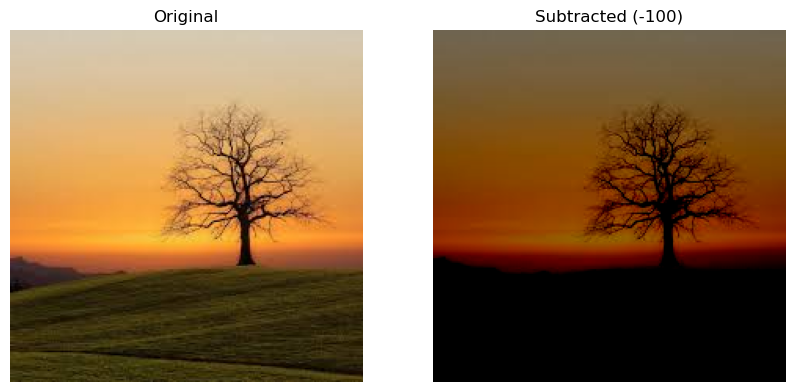

In [16]:
# -----------------------------
# Task 6.1 — Subtract intensity (darken)
# -----------------------------
sub_val = 100
img_sub = cv2.subtract(img, sub_val)
show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")

# Task 6.1 Answer:
# Increasing sub_val darkens the image because pixel values are reduced toward 0.



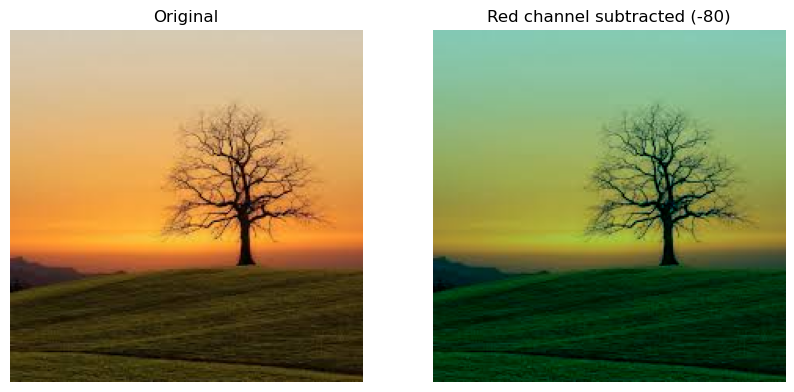

In [17]:
# -----------------------------
# Task 6.2 — Subtract from red channel only
# -----------------------------
sub_val_r = 80
img_red_only = img.copy()
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)
show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")



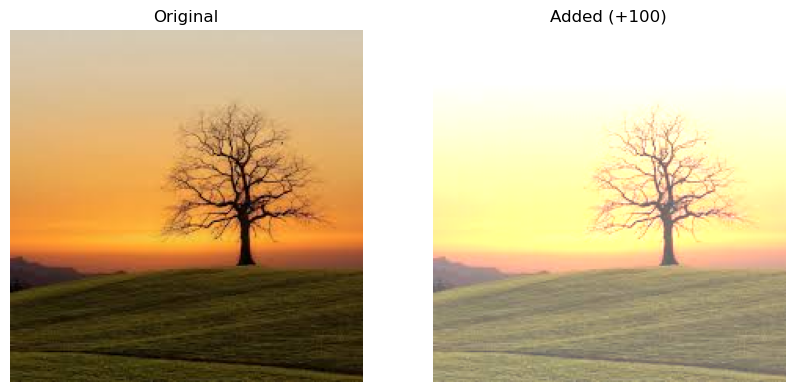

In [18]:
# -----------------------------
# Task 6.3 — Add intensity (brighten)
# -----------------------------
add_val = 100
img_add = cv2.add(img, add_val)
show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")

# Task 6.3 Answer:
# Increasing add_val brightens the image because pixel values increase toward 255.


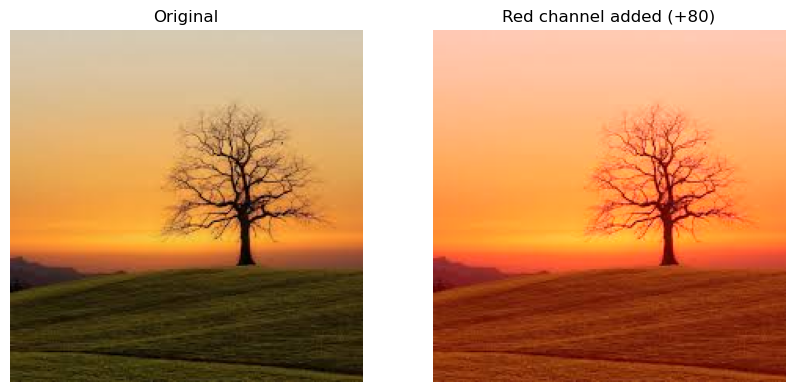

In [19]:

# -----------------------------
# Task 6.4 — Add to red channel only
# -----------------------------
add_val_r = 80
img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)
show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")



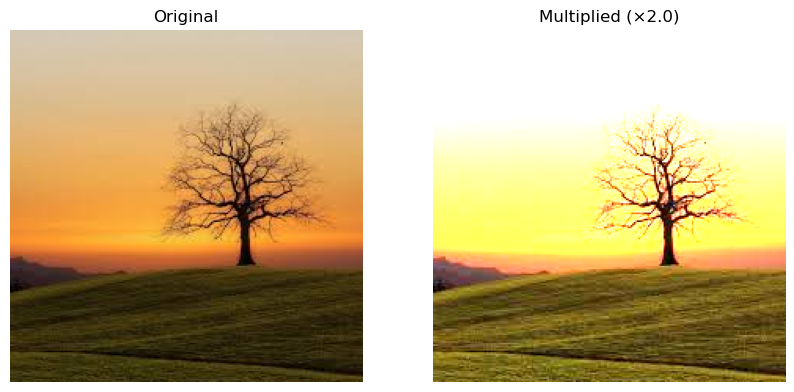

In [20]:
# -----------------------------
# Task 6.5 — Multiply by constant (contrast/brightness)
# -----------------------------
factor = 2.0
img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)
show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")

# Task 6.5 Answer:
# Multiplying by >1 increases brightness/contrast; <1 darkens image.

# -----------------------------


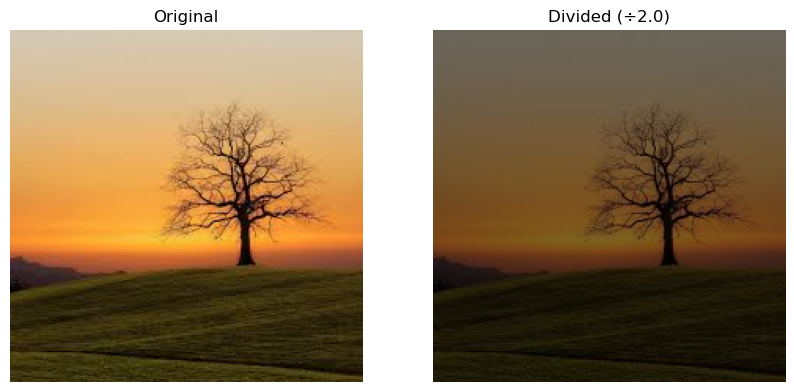

In [21]:
# Task 6.6 — Divide by constant
# -----------------------------
divisor = 2.0
img_div = clip_uint8(img_f / divisor)
show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")

# Task 6.6 Answer:
# Dividing by >1 darkens the image; dividing by <1 brightens it (can saturate at 255).


In [ ]:
REPORT:
In this lab, I explored fundamental image processing operations using OpenCV and NumPy. I learned how to load images, convert color spaces, perform thresholding, crop regions of interest, and manipulate pixel values through arithmetic operations. Thresholding taught me the difference between manual and automatic methods, with Otsu’s method demonstrating how a data-driven approach can automatically choose the optimal threshold. Cropping reinforced the row-major indexing convention (img[y, x]) used in NumPy arrays. Converting to HSV highlighted how separating hue, saturation, and value can simplify certain analyses, such as isolating color information.
Among the operations, arithmetic manipulations—addition, subtraction, multiplication, and division—were the most insightful. They allowed controlled brightening, darkening, and contrast adjustments, both globally and channel-wise. For example, modifying only the red channel illustrated how selective editing can affect the color balance without altering other channels.
Challenges included ensuring the correct file path and handling color order differences (OpenCV loads images as BGR by default, whereas matplotlib expects RGB). Another subtle issue was dtype management; arithmetic on uint8 types can saturate unexpectedly, so converting to float32 and clipping back to 0–255 was necessary to maintain image integrity. Overall, this lab strengthened my understanding of low-level image processing and the practical considerations needed to manipulate images correctly.